# 第４ステージ　ニューラルネットワークを作る

## ステップ37 テンソルを扱う

### 37.1 要素ごとの計算

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import leopard.functions as F
from leopard import Variable

In [2]:
# 入力と出力が全てスカラ
x = Variable(np.array(1.0))
y = F.sin(x)
print(y)

variable(0.8414709848078965)


In [3]:
# 入力がテンソル -> 入力の各要素に適用
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sin(x)
print(y)

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]])


In [4]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
y = x + c
print(y)

variable([[11 22 33]
          [44 55 66]])


### 37.2 テンソルを使用したときのバックプロパゲーション
これまで「スカラ」を対象に微分を求めたが、「テンソル」でも正しく動作する。

In [5]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
y = x + c

y.backward(retain_grad=True) # retain_grad=Trueで微分を保持する
print(y.grad)
print(x.grad)
print(c.grad)

variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


### 37.3 【補足】テンソルを使用したときのバックプロパゲーション

$
\boldsymbol y = (y_1, \ y_2, \ \cdots, \ y_n), \ \boldsymbol x = (x_1, \ x_2, \ \cdots, \ x_n)
$
としたとき、$\boldsymbol y = F(\boldsymbol x)$の微分を見てみる。<br>

$$
\frac{\partial \boldsymbol y}{\partial \boldsymbol x} =
\begin{pmatrix}

\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_n} \\

\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_1} & \cdots & \frac{\partial y_2}{\partial x_n} \\

\vdots & \vdots & \ddots & \vdots \\

\frac{\partial y_n}{\partial x_1} & \frac{\partial y_n}{\partial x_1} & \cdots & \frac{\partial y_n}{\partial x_n}

\end{pmatrix}
$$

$\boldsymbol y , \ \boldsymbol x$がどちらもベクトルであることから、**ヤコビ行列**になる。<br>
ちなみに、もし$\boldsymbol y$がベクトルではなくスカラであれば、微分は次のようになる。
$$
\frac{\partial y}{\partial \boldsymbol x} = (\frac{\partial y}{\partial x_1} \quad \frac{\partial y}{\partial x_2} \quad \cdots \quad \frac{\partial y}{\partial x_n})
$$
これは、$1 \times n$のヤコビ行列、もしくは行ベクトルと見なせる。

次に、合成関数について考える。$y=F(\boldsymbol x)$という合成関数について、$\boldsymbol a = A(\boldsymbol x), \ \boldsymbol b = B(\boldsymbol a), \ y = C(\boldsymbol b)$で構成されている場合を考える。<br>

$\boldsymbol x, \ \boldsymbol a, \ \boldsymbol b$はベクトルで、その要素数は$n$とする。また、$y$はスカラであるとする。すると、$\boldsymbol x$に関する微分は、
$$\frac{\partial y}{\partial \boldsymbol x} = \frac{\partial y}{\partial \boldsymbol b}
\frac{\partial \boldsymbol b}{\partial \boldsymbol a} \frac{\partial \boldsymbol a}{\partial \boldsymbol x}
$$
となる。ここで、$\frac{\partial y}{\partial \boldsymbol b}$は行ベクトル、$\frac{\partial \boldsymbol b}{\partial \boldsymbol a}, \ \frac{\partial \boldsymbol a}{\partial \boldsymbol x}$は$n \times n$行列である。<br>

また、$\boldsymbol a = A(\boldsymbol x), \ \boldsymbol b = B(\boldsymbol a)$がどちらも要素ごとの演算を行った場合を仮定する。例えば、$\boldsymbol a = A(\boldsymbol x) = \sin(\boldsymbol x)$の時、

$$

\begin{aligned}
\boldsymbol a &= 

(a_1 \quad a_2 \quad \cdots \quad a_n)

=

\biggl( \sin(x_1) \quad \sin(x_2) \quad \cdots \quad \sin(x_n) \biggr)

 \\

\\

\therefore \frac{\partial \boldsymbol a}{\partial \boldsymbol x} &= 

\begin{pmatrix}

\frac{\partial a_1}{\partial x_1} & 0 & \cdots & 0 \\

0 & \frac{\partial a_2}{\partial x_2} & \cdots & 0 \\

\vdots & \vdots & \ddots & \vdots \\

0 & 0 & \cdots & \frac{\partial a_n}{\partial x_n} 

\end{pmatrix}

\end{aligned}

$$

$\boldsymbol b$についても同様であるため、

$$\begin{aligned}
\biggl( (\frac{\partial y}{\partial \boldsymbol b} \frac{\partial \boldsymbol b}{\partial \boldsymbol a}) \frac{\partial \boldsymbol a}{\partial \boldsymbol x} \biggr) &= 
(\frac{\partial y}{\partial b_1} \quad \frac{\partial y}{\partial b_2} \quad \cdots \quad \frac{\partial y}{\partial b_n})

\begin{pmatrix}
\frac{\partial b_1}{\partial a_1} & 0 & \cdots & 0 \\

0 & \frac{\partial b_2}{\partial a_2} & \cdots & 0 \\

\vdots & \vdots & \ddots & \vdots \\

0 & 0 & \cdots & \frac{\partial b_n}{\partial a_n} 

\end{pmatrix}

\begin{pmatrix}
\frac{\partial a_1}{\partial x_1} & 0 & \cdots & 0 \\

0 & \frac{\partial a_2}{\partial x_2} & \cdots & 0 \\

\vdots & \vdots & \ddots & \vdots \\

0 & 0 & \cdots & \frac{\partial a_n}{\partial x_n} 

\end{pmatrix}
\\
\\
\Leftrightarrow &=
(\frac{\partial y}{\partial b_1}\frac{\partial b_1}{\partial a_1} \quad \frac{\partial y}{\partial b_2}\frac{\partial b_2}{\partial a_2} \quad \cdots \quad \frac{\partial y}{\partial b_n}\frac{\partial b_n}{\partial a_n})

\begin{pmatrix}
\frac{\partial a_1}{\partial x_1} & 0 & \cdots & 0 \\

0 & \frac{\partial a_2}{\partial x_2} & \cdots & 0 \\

\vdots & \vdots & \ddots & \vdots \\

0 & 0 & \cdots & \frac{\partial a_n}{\partial x_n} 

\end{pmatrix}
\\
\\
\Leftrightarrow &=
(\frac{\partial y}{\partial b_1}\frac{\partial b_1}{\partial a_1}\frac{\partial a_1}{\partial x_1} \quad \frac{\partial y}{\partial b_2}\frac{\partial b_2}{\partial a_2}\frac{\partial a_2}{\partial x_2} \quad \cdots \quad \frac{\partial y}{\partial b_n}\frac{\partial b_n}{\partial a_n}\frac{\partial a_n}{\partial x_n})

\end{aligned}$$
となり、要素ごとの演算の場合は、逆伝播も微分を要素ごとに掛け算することで求められる。

- memo <br>
各要素に対して演算する場合について、バックプロパゲーションと公式適用とでおおよそ一致することを確かめてみた。

In [6]:
def f(x):
    return (F.exp(x ** 2)) ** 2

In [7]:
# back propagation
x = Variable(np.array([0.5, 2, 3]))
y = f(x)
y.backward()
print(x.grad)

variable([3.29744254e+00 2.38476639e+04 7.87919630e+08])


In [8]:
def diff(f, x, eps=1e-4):
    x0 = Variable(x.data - eps)
    x1 = Variable(x.data + eps)
    y0 = f(x0)
    y1 = f(x1)
    return (y1.data - y0.data) / (2 * eps)

In [9]:
# 公式適用
x = Variable(np.array([0.5, 2, 3]))
y_diff = diff(f, x)
print(y_diff)

[3.29744263e+00 2.38476669e+04 7.87919835e+08]


## ステップ38　形状を変える関数

### 38.1　reshape関数の実装
例えば、変数の形状を(2, 3)から(6,)へと変換する場合の逆伝播は、(6,)から(2, 3)へと変換する。

順伝播：

$$

x =

\begin{pmatrix}

1 & 2 & 3 \\
4 & 5 & 6

\end{pmatrix}

\Rightarrow \rm{reshape}(x, \ (6,)) \Rightarrow (1 \quad 2 \quad 3 \quad 4 \quad 5 \quad 6) \Rightarrow y
$$

逆伝播：

$$

gx =

\begin{pmatrix}

a & b & c \\
d & e & f

\end{pmatrix}

\Leftarrow \rm{reshape}(x, \ (2, \ 3)) \Leftarrow (a \quad b \quad c \quad d \quad e \quad f) \Leftarrow gy
$$

In [10]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(x.grad, x.grad.shape, y.shape)

variable([[1 1 1]
          [1 1 1]]) (2, 3) (6,)


### 38.2　Variableからreshapeを使う
現状のreshape関数をNumpyのそれに近づける。

In [11]:
x = np.random.rand(1, 2, 3)

y = x.reshape((2, 3)) # tuple
y = x.reshape([2, 3]) # list
y = x.reshape(2, 3) # そのまま

In [12]:
x = Variable(np.random.randn(1, 2, 3))
y = x.reshape((2, 3))
y = x.reshape(2, 3)

### 38.3　行列の転置
順伝播で(3, 2)を(2, 3)にしたら、逆伝播では、(2, 3)を(3, 2)にする。
つまり、reshapeと同様に順伝播の逆をすると良い。

In [13]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.transpose(x)  # y = x.T
y.backward()
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [14]:
x = Variable(np.random.rand(2, 3))
y = x.transpose()
print(y)
y = x.T
print(y)

variable([[0.43759131 0.32570824]
          [0.20557424 0.0738332 ]
          [0.12700546 0.42864455]])
variable([[0.43759131 0.32570824]
          [0.20557424 0.0738332 ]
          [0.12700546 0.42864455]])


### 38.4 【補足】実際のtranspose関数

In [15]:
A, B, C, D = 1, 2, 3, 4

x = Variable(np.random.rand(A, B, C, D))
print(x.shape)

y = x.transpose(1, 0, 3, 2)
y.backward()
print(x.grad.shape)

(1, 2, 3, 4)
(1, 2, 3, 4)


- memo<br>
    以下、`leopard/functions.py`のTranspose関数から抜粋
    ```Py
    class Transpose(Function):
        ...

        def backward(self, gy):
            if self.axes is None:
                return transpose(gy)

            axes_len = len(self.axes)
            inv_axes = tuple(np.argsort([ax % axes_len for ax in self.axes]))
            return transpose(gy, inv_axes)
    ```
    `inv_axes`の部分で、入力と同じになるように並び替えた次元のタプルが生成されている。<br>
    以下、並び替えの実験

In [16]:
A, B, C, D = 1, 2, 3, 4
axes = (D-1, A-1, B-1, C-1)
print(axes)

(3, 0, 1, 2)


- `np.argsort`は、引数を小さい順に並び替えた際の、元の引数のindexを返す。<br>
    上記の例で言うと、<br>
    `(index[0]: 3, index[1]: 0, index[2]: 1, index[3]: 2)`<br>
    ` -> (index[1]: 0, index[2]: 1, index[3]: 2, index[0]: 3)`

In [17]:
inv_axes = tuple(np.argsort(axes))
print(inv_axes)

(1, 2, 3, 0)


In [18]:
# 昇順に戻っている
[axes[i] for i in inv_axes]

[0, 1, 2, 3]

## ステップ39 和を求める関数

### 39.1 sum関数の逆伝播

順伝播：

$$

x = (1 \quad 2 \quad 3 \quad 4 \quad 5 \quad 6)
\Rightarrow \rm{sum}(x) \Rightarrow 21 \Rightarrow y
$$

逆伝播：

$$

gx = (a \quad a \quad a \quad a \quad a \quad a)
\Leftarrow \rm{broadcast\_to}(x, \ (6, )) \Leftarrow a \Leftarrow gy
$$


### 39.2 sum関数の実装

In [19]:
x = Variable(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([1 1 1 1 1 1])


In [20]:
# 2次元配列（行列）の場合
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([[1 1 1]
          [1 1 1]])


### 39.3　axisとkeepdims
Numpyの`np.sum`関数には、<strong>軸</strong>を指定する`axis`という引数と、入力と出力の次元数を保つかどうかを指定する`keepdims`がある。これを使えるよう修正する。

In [21]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, axis=0)
print(y)
print(y.shape)
y = np.sum(x, axis=1)
print(y)
print(y.shape)

[5 7 9]
(3,)
[ 6 15]
(2,)


In [22]:
y = np.sum(x, keepdims=True)
print(y.shape)

y = np.sum(x, keepdims=False)
print(y)

(1, 1)
21


In [23]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x, axis=0)
y.backward()
print(y)
print(x.grad)

x = Variable(np.random.randn(2, 3, 4, 5))
y = x.sum(keepdims=True)
print(y.shape)

variable([5 7 9])
variable([[1 1 1]
          [1 1 1]])
(1, 1, 1, 1)


## ステップ40 ブロードキャストを行う関数

### 40.1　broadcast_to関数とsum_to関数

1. broadcast_to関数 <br>

順伝播：

$$
x = (1 \quad 2 \quad 3)
\Rightarrow \rm{broadcast\_to}(x, \ (2, \ 3)) \Rightarrow

\begin{pmatrix}

1 & 2 & 3 \\
1 & 2 & 3

\end{pmatrix}

\Rightarrow y
$$

逆伝播：

$$

gx =

(2 \quad 2 \quad 2)

\Leftarrow \rm{sum\_to}(x, \ (3,)) \Leftarrow

\begin{pmatrix}

1 & 1 & 1 \\
1 & 1 & 1

\end{pmatrix}

\Leftarrow gy

$$

<br>

2. sum_to関数 <br>
   
順伝播：

$$
x =

\begin{pmatrix}

1 & 2 & 3 \\
4 & 5 & 6

\end{pmatrix}

\Rightarrow \rm{sum\_to}(x, \ (3,)) \Rightarrow

(5 \quad 6 \quad 7)

\Rightarrow y
$$

逆伝播：

$$

gx =

\begin{pmatrix}

1 & 1 & 1 \\
1 & 1 & 1

\end{pmatrix}

\Leftarrow \rm{broadcast\_to}(x, \ (2, \ 3)) \Leftarrow

(1 \quad 1 \quad 1)

\Leftarrow gy

$$

In [24]:
x = np.array([1, 2, 3])
y = np.broadcast_to(x, (2, 3))
print(y)

[[1 2 3]
 [1 2 3]]


broadcast_to関数の逆伝播は、入力xの形状になるように勾配の和を求めれば良い。<br>
sum_to関数は、xの要素の和を求めてshapeの形状にする。

In [25]:
from leopard.utils import sum_to

In [26]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = sum_to(x, (1, 3))
print(y, y.shape)

y = sum_to(x, (2, 1))
print(y, y.shape)

[[5 7 9]] (1, 3)
[[ 6]
 [15]] (2, 1)


### 40.2 DeZeroのbroadcast_toとsum_to関数
sum_to関数の逆伝播は、broadcast_to関数を使って、入力の形状になるように勾配の要素を複製すると良い

### 40.3 ブロードキャストへの対応
現状では、順伝播のみ対応しているため、逆伝播にも対応する。

In [27]:
x0 = np.array([1, 2, 3])
x1 = np.array([10])

y = x0 + x1
print(y)

[11 12 13]


In [28]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))

y = x0 + x1
print(y)

variable([11 12 13])


In [29]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

y.backward()
print(x0.grad, x1.grad)

variable([11 12 13])
variable([1 1 1]) variable([3])


## ステップ41 行列の積
### 41.1 ベクトルの内積と行列の積

In [30]:
# ベクトルの内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.dot(a, b)
print(c)

# 行列の積
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.dot(a, b)
print(c)

32
[[19 22]
 [43 50]]


### 41.2 行列の形状チェック

$\boldsymbol x$は$(a \times b)$の行列、$W$は$(b \times c)$の行列、$\boldsymbol y$は$(a \times c)$の行列、$L$をスカラーとして、以下の状況を考える。

$$

\begin{aligned}

\boldsymbol y &= \boldsymbol{x} W \\

&=

\begin{pmatrix}

x_{11} & x_{12} & \cdots & x_{1b} \\

x_{21} & x_{22} & \cdots & x_{2b} \\

\vdots & \vdots & \ddots & \vdots \\

x_{a1} & x_{a2} & \cdots & x_{ab}

\end{pmatrix}

\begin{pmatrix}

w_{11} & w_{12} & \cdots & w_{1c} \\

w_{21} & w_{22} & \cdots & w_{2c} \\

\vdots & \vdots & \ddots & \vdots \\

w_{b1} & w_{b2} & \cdots & w_{bc}

\end{pmatrix}

\\

\Leftrightarrow &=

\begin{pmatrix}

x_{11}w_{11} + x_{12}w_{21} +  \cdots + x_{1b}w_{b1} & \cdots & x_{11}w_{1c} + x_{12}w_{2c} +  \cdots + x_{1b}w_{bc}\\

x_{21}w_{11} + x_{22}w_{21} +  \cdots + x_{2b}w_{b1} & \cdots & x_{21}w_{1c} + x_{22}w_{2c} +  \cdots + x_{2b}w_{bc} \\

\vdots & \ddots & \vdots \\

x_{a1}w_{11} + x_{a2}w_{21} +  \cdots + x_{ab}w_{b1} & \cdots & x_{a1}w_{1c} + x_{a2}w_{2c} +  \cdots + x_{ab}w_{bc}

\end{pmatrix}

\\

\Leftrightarrow &= 

\begin{pmatrix}

\sum_{k=1}^{b} x_{1k}w_{k1} & \sum_{k=1}^{b} x_{1k}w_{k2} & \cdots & \sum_{k=1}^{b} x_{1k}w_{kc} \\

\sum_{k=1}^{b} x_{2k}w_{k1} & \sum_{k=1}^{b} x_{2k}w_{k2} & \cdots & \sum_{k=1}^{b} x_{2k}w_{kc} \\

\vdots & \vdots & \ddots & \vdots \\

\sum_{k=1}^{b} x_{ak}w_{k1} & \sum_{k=1}^{b} x_{ak}w_{k2} & \cdots & \sum_{k=1}^{b} x_{ak}w_{kc}

\end{pmatrix}

\\

\Leftrightarrow &= 

\begin{pmatrix}

y_{11} & y_{12} & \cdots & y_{1c} \\

y_{21} & y_{22} & \cdots & y_{2c} \\

\vdots & \vdots & \ddots & \vdots \\

y_{a1} & y_{a2} & \cdots & y_{ac}

\end{pmatrix}

\\

\\

L &= Loss(\boldsymbol y)

\end{aligned}

$$

#### ① $\boldsymbol x$の勾配$\frac{\partial L}{\partial \boldsymbol x}$

このとき、$\boldsymbol x$の$(i, \ j)$成分に関する微分は、$\boldsymbol y$の$i$行目の微分の総和になるので、<br>

$$

\frac{\partial L}{\partial x_{ij}} = \sum_{k = 1}^{c} \frac{\partial L}{\partial y_{ik}} \frac{\partial y_{ik}}{\partial x_{ij}}　\tag{1} 

$$

式(1)はまだ簡単にできて、

$$

\begin{aligned}

\frac{\partial y_{ik}}{\partial x_{ij}} &= w_{jk} \\

( \ \because y_{ik} &= x_{i1}w_{1k} + \cdots +  x_{ij}w_{jk} + \cdots + x_{ib}w_{bk}) \\

\\
\therefore

\frac{\partial L}{\partial x_{ij}} &= \sum_{k = 1}^{c} \frac{\partial L}{\partial y_{ik}} \frac{\partial y_{ik}}{\partial x_{ij}} = \sum_{k = 1}^{c} \frac{\partial L}{\partial y_{ik}} w_{jk}

\end{aligned}

$$

以上のことから$\frac{\partial L}{\partial x_{ij}}$は、「行列$\frac{\partial L}{\partial \boldsymbol y}$の$i$行目のベクトル」と「行列$W$の$j$行目のベクトル」の内積によって求められる。よって、

$$

\begin{aligned}

\frac{\partial L}{\partial \boldsymbol x} &=

\begin{pmatrix}

\frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \cdots & \frac{\partial L}{\partial x_{1c}} \\

 \frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \cdots & \frac{\partial L}{\partial x_{2c}} \\

\vdots & \vdots & \ddots & \vdots \\

 \frac{\partial L}{\partial y_{a1}} & \frac{\partial L}{\partial y_{a2}} & \cdots & \frac{\partial L}{\partial y_{ac}} 

\end{pmatrix}

\begin{pmatrix}

w_{11} & w_{12} & \cdots & w_{1c} \\

w_{21} & w_{22} & \cdots & w_{2c} \\

\vdots & \vdots & \ddots & \vdots \\

w_{b1} & w_{b2} & \cdots & w_{bc}

\end{pmatrix} ^T

\\

\\

\Leftrightarrow &=

\frac{\partial L}{\partial \boldsymbol y} W^T

\end{aligned}

$$

となる。

#### ② $W$の勾配$\frac{\partial L}{\partial W}$

$W$の$(i, \ j)$成分に関する微分は、$\boldsymbol y$の$j$列目の微分の総和になるので、

$$

\frac{\partial L}{\partial w_{ij}} = \sum_{k=1}^{a} \frac{\partial L}{\partial y_{kj}} \frac{\partial y_{kj}}{\partial w_{ij}}

$$

また、

$$

\begin{aligned}

\frac{\partial y_{kj}}{\partial w_{ij}} &= x_{ki} \\

(\because &= x_{k0}w_{0j} + \cdots + x_{ki}w_{ij} + \cdots + x_{kb}w_{bj}) \\

\\

\therefore

\frac{\partial L}{\partial x_{ij}} &= \sum_{k = 1}^{a} \frac{\partial L}{\partial y_{kj}} \frac{\partial y_{kj}}{\partial x_{ij}} = \sum_{k = 1}^{a} \frac{\partial L}{\partial y_{kj}} x_{ki}

\end{aligned}

$$

以上のことから$\frac{\partial L}{\partial W_{ij}}$は、「行列$\boldsymbol x$の$i$列目の列ベクトル」と「行列$W$の$j$列目の列ベクトル」との内積となる。よって、

$$

\begin{aligned}

\frac{\partial L}{\partial W} &=

\begin{pmatrix}

x_{11} & x_{12} & \cdots & w_{1b} \\

x_{21} & x_{22} & \cdots & w_{2b} \\

\vdots & \vdots & \ddots & \vdots \\

x_{a1} & x_{a2} & \cdots & w_{ab}

\end{pmatrix} ^T


\begin{pmatrix}

\frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \cdots & \frac{\partial L}{\partial y_{1c}} \\

 \frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \cdots & \frac{\partial L}{\partial y_{2c}} \\

\vdots & \vdots & \ddots & \vdots \\

 \frac{\partial L}{\partial y_{a1}} & \frac{\partial L}{\partial y_{a2}} & \cdots & \frac{\partial L}{\partial y_{ac}} 

\end{pmatrix}

\\

\\

\Leftrightarrow &=

\boldsymbol x^T \frac{\partial L}{\partial \boldsymbol y}

\end{aligned}

$$


#### ③ 行列の形状

次に、$y = xW$において、行列の形状に注目すると、

$$

\begin{aligned}

\frac{\partial L}{\partial x} \quad &= \quad \frac{\partial L}{\partial y} \quad \quad  W^T \\

(a \times b) & \quad \ (a \times c) \quad  (c \times b) \\

\\

\frac{\partial L}{\partial W} \quad &= \quad  x^T \quad \quad \frac{\partial L}{\partial y} \\

(b \times c) & \quad \ (b \times a) \quad  (a \times c)

\end{aligned}

$$

のようにすれば、入力する$x, \ W$の形状と、逆伝播で求める$\frac{\partial L}{\partial x}, \ \frac{\partial L}{\partial W}$の形状とが一致することがわかる。

In [31]:
x = Variable(np.random.randn(2, 3))
W = Variable(np.random.randn(3, 4))
y = F.matmul(x, W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


## ステップ42 線形回帰

### 42.1 トイ・データセット

In [32]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

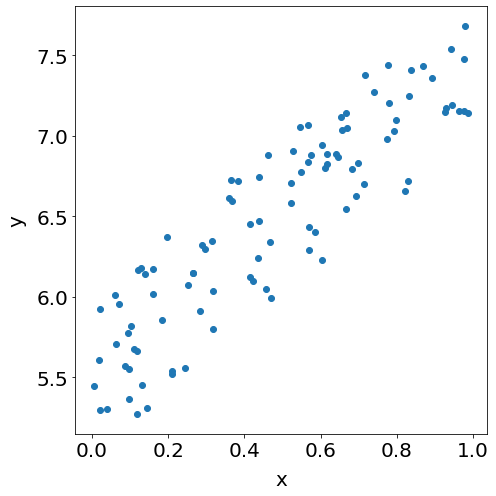

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(x, y)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('y', fontsize=20, labelpad=10)
ax.set_xlabel('x', fontsize=20, labelpad=10)
fig.tight_layout()

### 42.2 線形回帰の理論
上記のデータに合うような直線$y=Wx+b$を見つける。<br>
データとモデルの誤差を平均２乗誤差で定義し、この誤差を最小化する$W$と$b$を見つける。

$$
\begin{aligned}
\boldsymbol y &= f(\boldsymbol x) = W \boldsymbol x + \boldsymbol b \\
L &= \frac{1}{n}\sum_{i=1}^{n} \bigl(f(x_i) - y_i \bigr)^2
\end{aligned}
$$

In [34]:
# トイ・データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y) # 省略可

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

In [35]:
def predict(x):
    y = F.matmul(x, W) + b
    return y

In [36]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [37]:
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    if i % 10 == 0:
        print(W, b, loss)

print(W, b, loss)

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.45731071]]) variable([5.27768752]) variable(0.10078974954301652)
variable([[2.39696452]]) variable([5.3238]) variable(0.09461859803040694)
variable([[2.33913091]]) variable([5.35400772]) variable(0.0902667138137311)
variable([[2.28830557]]) variable([5.37981674]) variable(0.08694585483964615)
variable([[2.24388206]]) variable([5.40233244]) variable(0.08441084206493275)
variable([[2.20506799]]) variable([5.42200258]) variable(0.08247571022229121)
variable([[2.17115586]]) variable([5.43918838]) variable(0.08099850454041051)
variable([[2.14152662]]) variable([5.45420371]) variable(0.07987086218625004)
variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756)


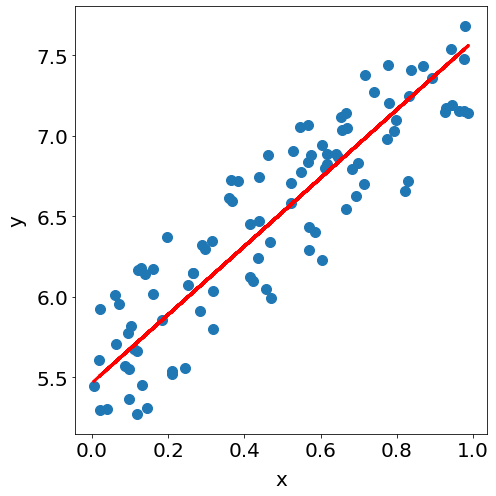

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(x.data, y.data, s=100)
ax.plot(x.data, y_pred.data, color='red', linewidth=3)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('y', fontsize=20, labelpad=10)
ax.set_xlabel('x', fontsize=20, labelpad=10)
fig.tight_layout()

### 42.4 【補足】DeZeroのmean_squared_error関数
メモリ効率の良い実装をするため、`MeanSquaredError`クラスを作る。
以下がその実装である。

```Python
class MeanSquaredError(Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        y = (diff**2).sum() / len(diff)
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gx0 = gy * diff * (2.0 / len(diff))
        gx1 = -gx0
        return gx0, gx1


def mean_squared_error(x0, x1):
    return MeanSquaredError()(x0, x1)

```

平均二乗誤差の微分を求めてみる。$\hat{\boldsymbol y}$をモデルの予測値、$\boldsymbol y$を正解の値とする。

$$

\begin{aligned}

L &= \frac{1}{n}\sum_{i=1}^{n} \bigl(\hat{y_i} - y_i \bigr)^2 \\

\frac{\partial L}{\partial \hat{\boldsymbol y}} &= \frac{1}{n}
\frac{\partial}{\partial \hat{\boldsymbol y}} \biggl(
(\hat{y_1} - y_1)^2 + (\hat{y_2} - y_2)^2 +\cdots + (\hat{y_n} - y_n)^2 \biggr) \\

&= (\frac{\partial L}{\partial \hat{y_1}} \quad \frac{\partial L}{\partial \hat{y_2}} \quad \cdots \quad \frac{\partial L}{\partial \hat{y_n}}) \\

&= \frac{2}{n} (\hat{y_1} - y_1 \quad \hat{y_2} - y_2 \quad \cdots \quad \hat{y_n} - y_n) \\

&= \frac{2}{n} (\hat{\boldsymbol y} - \boldsymbol y) \\

\\

\frac{\partial L}{\partial \boldsymbol y} &= \frac{1}{n}
\frac{\partial}{\partial \boldsymbol y} \biggl(
(\hat{y_1} - y_1)^2 + (\hat{y_2} - y_2)^2 +\cdots + (\hat{y_n} - y_n)^2 \biggr) \\

&= (\frac{\partial L}{\partial y_1} \quad \frac{\partial L}{\partial y_2} \quad \cdots \quad \frac{\partial L}{\partial y_n}) \\

&= - \frac{2}{n} (\hat{y_1} - y_1 \quad \hat{y_2} - y_2 \quad \cdots \quad \hat{y_n} - y_n) \\

&=  - \frac{2}{n} (\hat{\boldsymbol y} - \boldsymbol y) 

\end{aligned}

$$


## ステップ43 ニューラルネットワーク

### 43.1　linear関数
省略

### 43.2　非線形なデータセット

In [39]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

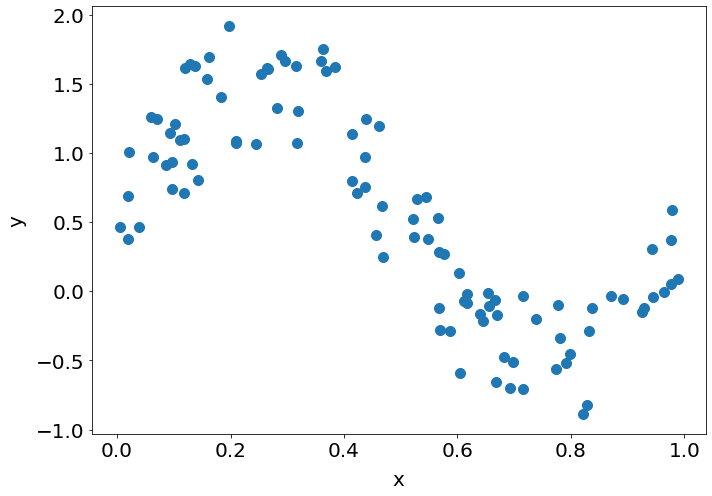

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(x, y, s=100)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('y', fontsize=20, labelpad=10)
ax.set_xlabel('x', fontsize=20, labelpad=10)
fig.tight_layout()

### 43.2 活性化関数とニューラルネットワーク
ここでは、以下のシグモイド関数を使う。

$$

\begin{aligned}

y &= \frac{1}{1 + \exp(-x)} \\

\\

y'(x) &= \frac{\exp(-x)}{\bigl( 1 + \exp(-x) \bigr)^2} \\

\Leftrightarrow &= \frac{\bigl( 1 + \exp(-x) \bigr) - 1}{\bigl( 1 + \exp(-x) \bigr)^2} \\

\Leftrightarrow &= \frac{1}{1 + \exp(-x)} - \frac{1}{\bigl( 1 + \exp(-x) \bigr)^2} \\

\Leftrightarrow &= \frac{1}{1 + \exp(-x)} \biggl( 1 - \frac{1}{1 + \exp(-x)} \biggr) \\

\Leftrightarrow &= y(1-y)

\end{aligned}

$$

### 43.4 ニューラルネットワークの実装
I(=1)は入力の次元数、H(=10)は隠れ層の次元数、O(=1)は出力層の次元数に対応する。

In [41]:
# 重みの初期化
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

In [42]:
# NNの推論
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

In [43]:
lr = 0.2 # learning_rate
iters = 10000 # epochs

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(i, loss)

0 variable(0.8473695850105871)
1000 variable(0.2514286285183606)
2000 variable(0.24759485466749878)
3000 variable(0.23786120447054837)
4000 variable(0.21222231333102975)
5000 variable(0.16742181117834257)
6000 variable(0.0968193261999275)
7000 variable(0.07849528290602342)
8000 variable(0.07749729552991162)
9000 variable(0.07722132399559321)


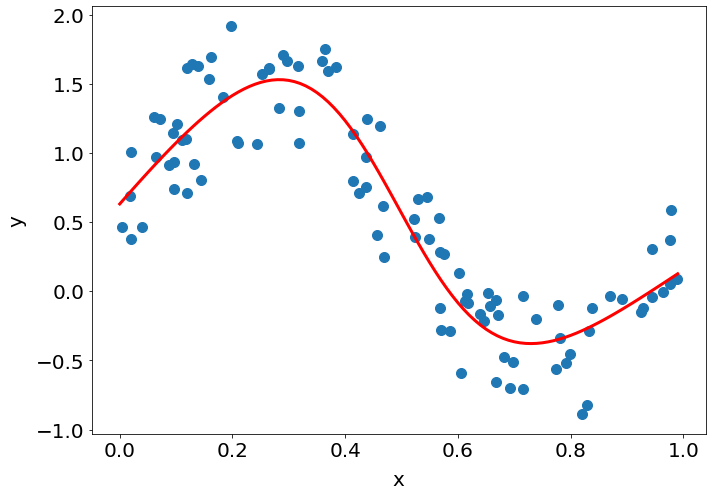

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(x, y, s=100)

t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
ax.plot(t, y_pred.data, color='r', linewidth=3)

ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('y', fontsize=20, labelpad=10)
ax.set_xlabel('x', fontsize=20, labelpad=10)
fig.tight_layout()

# stage4-2.ipynbへ続く